# Praca domowa nr 5

In [112]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


In [2]:
#Załadujmy nasze zbiory

Posts = pd.read_csv("data/Posts.csv")
Comments = pd.read_csv("data/Comments.csv")
Users = pd.read_csv("data/Users.csv")

## Zadanie 1

Text(0.5, 1.0, 'Histogram liczby odpowiedzi na post')

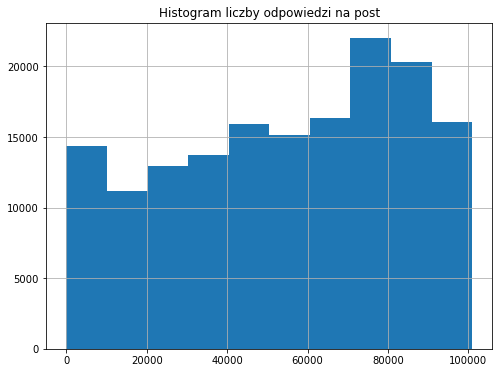

In [114]:
Comments.hist('PostId', figsize=(8,6))
plt.title('Histogram liczby odpowiedzi na post')

## Zadanie 2

In [5]:
Posts[['OwnerUserId','ViewCount']].merge(Users[['Id','DisplayName']], left_on='OwnerUserId', right_on='Id')\
    .groupby('DisplayName')\
    .sum('ViewCount')\
    .reset_index()\
    .sort_values(by='ViewCount', ascending=False)\
    .head(1)['DisplayName']

6156    Mark Mayo
Name: DisplayName, dtype: object

## Zadanie 3

In [109]:
Posts[Posts['Id'].isin(Posts['AcceptedAnswerId'])]\
    .value_counts('OwnerUserId')\
    .reset_index()\
    .rename(columns={0: 'n'})\
    .sort_values(by='n', ascending=False)\
    .merge(Users, left_on='OwnerUserId', right_on='Id')\
    .iloc[1]['DisplayName']

'jpatokal'

## Zadanie 4

In [108]:
Posts_accepted = Posts['Id'].isin(Posts['AcceptedAnswerId'])
                                  
a = Posts[Posts['ParentId'].isin(Posts[Posts_accepted]['ParentId'])]\
    .groupby('ParentId')\
    .max('Score')\
    .reset_index()\
    .rename(columns={'Score':'Max_Score'})\
    [['Id','Max_Score', 'ParentId']]\
    .merge(Posts[Posts['Id'].isin(Posts['AcceptedAnswerId'])], on='ParentId')

liczba_wiekszych = a[a['Max_Score']>a['Score']].count().reset_index()\
    .rename(columns={0:'n'}).iloc[1]['n']
liczba = a.count().reset_index()\
    .rename(columns={0:'n'}).iloc[1]['n']

odsetek = liczba_wiekszych / liczba
odsetek

0.09044220055710306